In [100]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
from sklearn import metrics
# To split the dataset into train and test datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To model the K Nearest Neighbour classifier
from sklearn.neighbors import KNeighborsClassifier
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score,roc_curve,plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import statistics
import string
import warnings 
warnings.filterwarnings( "ignore")


### 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [4]:
data=pd.read_excel(r"D:\DSBA\DSBA_Great Learning\27- ML-Project\Election_Data.xlsx", sheet_name="Election_Dataset_Two Classes")

In [5]:
data=data.drop(['Unnamed: 0'], axis=1)

In [6]:
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [7]:
data.shape

(1525, 9)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [29]:

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))



Number of duplicate rows = 8


In [30]:
data.describe(include='all')

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [31]:
### Skewness

In [10]:
data["gender"].value_counts()

female    812
male      713
Name: gender, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

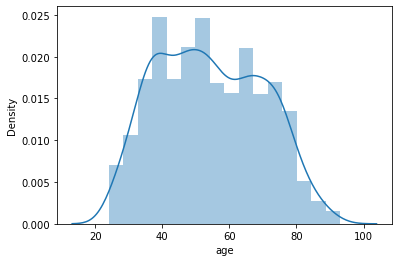

In [33]:
sns.distplot(data.age)

<AxesSubplot:xlabel='age of males', ylabel='Density'>

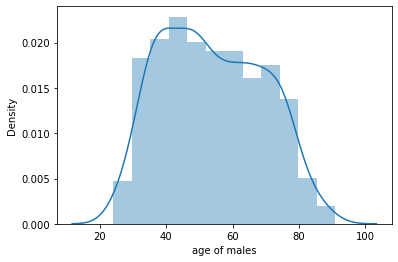

In [15]:
sns.distplot(data[data.gender=="male"].age,axlabel="age of males")

<AxesSubplot:xlabel='age of females', ylabel='Density'>

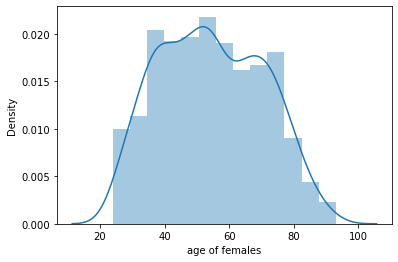

In [14]:
sns.distplot(data[data.gender=="female"].age, axlabel="age of females")

### 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

### Univariate analysis

#conclusions :

1.Median age of Group of people voting for conservative party is higher than that of those voting for the labour party.
2.Median age of Group of people who believe that national economic and social conditions are best (rating 5) are highest as compared to all other Group of people who thinks otherwise.Thus Group of people of higher age generally believes that national economic and social conditions are good.
3.However, median age of Group of people who believe that household economic and social conditions are best (rating 5) are lowest as compared to all other Group of people who thinks otherwise.Thus Group of people of lower age generally believes that household economic and social conditions are good.
4.Group of people who have given the highest performance rating (5) to both Blair from the labour party and hague from the conservative party are having higher median age as compared to others who believe that they deserve lower rating.
5.Group of people who are both sceptic(rating 11) and believer (rating 1) towards European integration are of highest median age, whereas those who are neutral  (rating  4 to 8) are of lower median age. Thus elderly people are divided in their opinion towards European integration whereas people of lower age are mostly neutral.
6.Group of people with lowest median age are showing highest knowledge towards the parties' position towards european Integration.


In [35]:
def univariateAnalysis(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(data[cat_column].value_counts())

    plt.figure()
    data[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")



In [36]:
#getting list of discrete variables

disc=['vote', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender']

Details of vote
----------------------------------------------------------------
Labour          1063
Conservative     462
Name: vote, dtype: int64


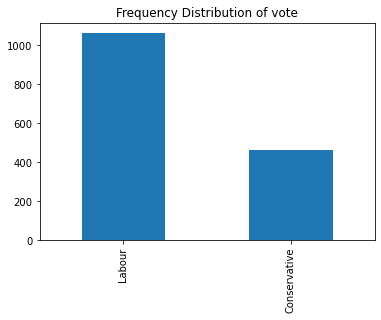

       
Details of economic.cond.national
----------------------------------------------------------------
3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64


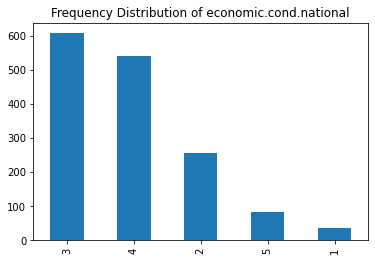

       
Details of economic.cond.household
----------------------------------------------------------------
3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64


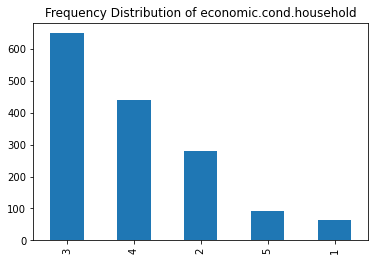

       
Details of Blair
----------------------------------------------------------------
4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64


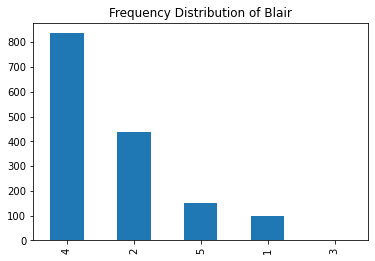

       
Details of Hague
----------------------------------------------------------------
2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64


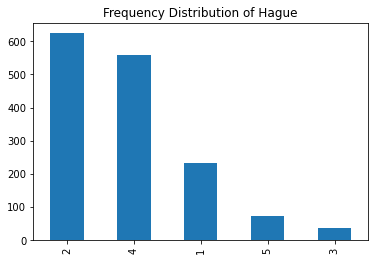

       
Details of Europe
----------------------------------------------------------------
11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64


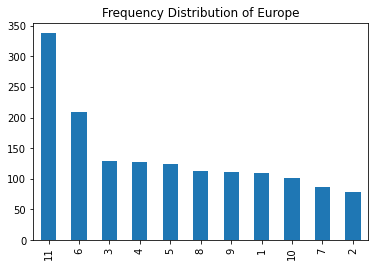

       
Details of political.knowledge
----------------------------------------------------------------
2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64


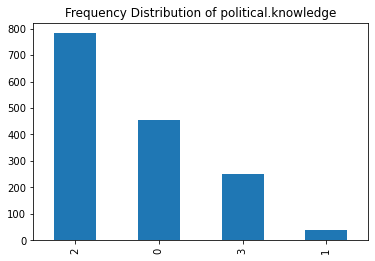

       
Details of gender
----------------------------------------------------------------
female    812
male      713
Name: gender, dtype: int64


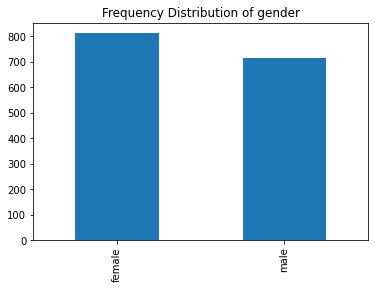

In [37]:
for i in disc :
    univariateAnalysis(i)

### Bivariate analysis

### Outlier check

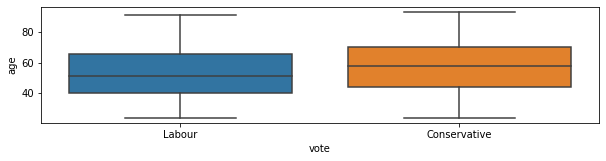

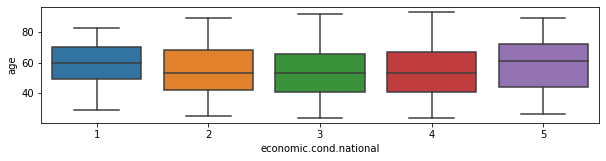

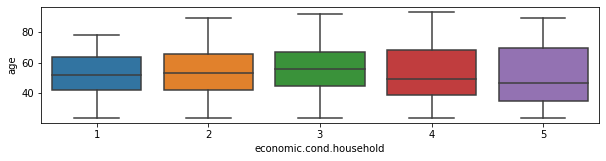

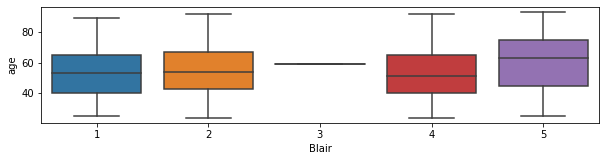

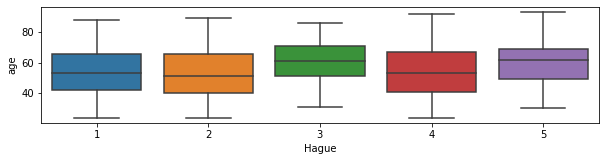

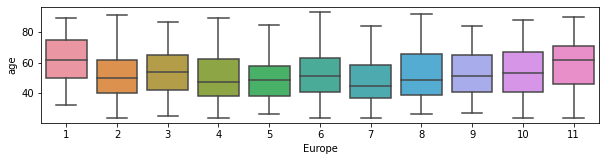

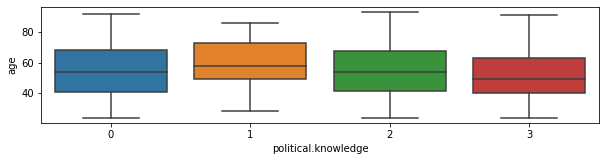

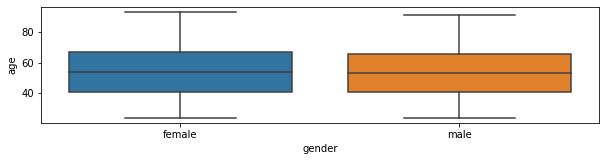

In [16]:
# there is only one continuous variable i.e. age
index=['vote',  'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
for i in range(len(index)):
    plt.figure(figsize=(10,20))
    plt.subplot(8,1,i+1)
    sns.boxplot(y=data.age, x=data[index[i]] )

## Multivariate analysis

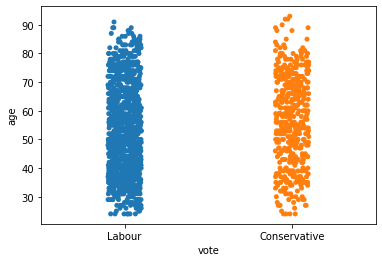

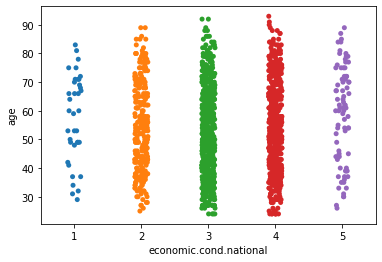

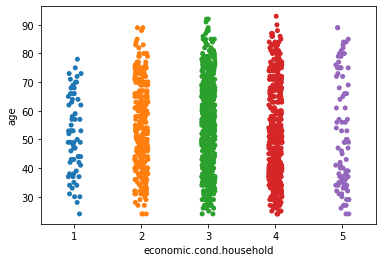

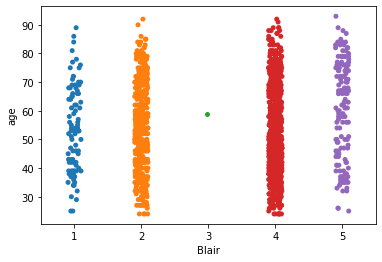

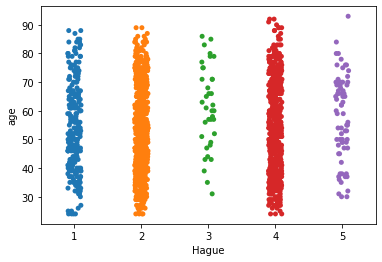

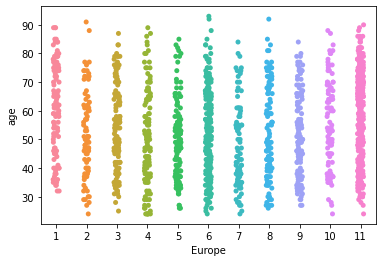

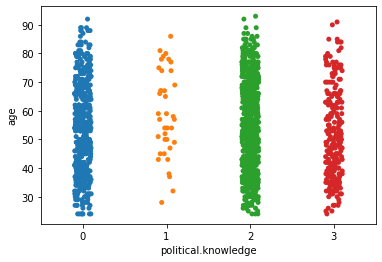

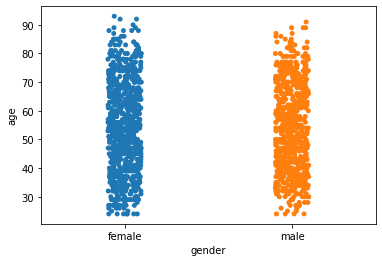

In [40]:
cat=['vote', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender']
for i in cat :
    sns.stripplot(x=data[i], y=data['age'], jitter=True)
    plt.show()

In [41]:
data.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

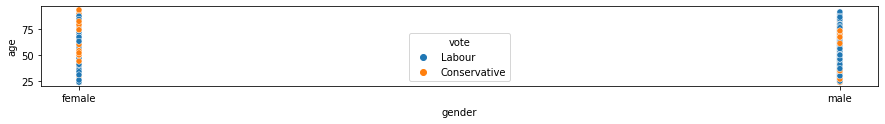

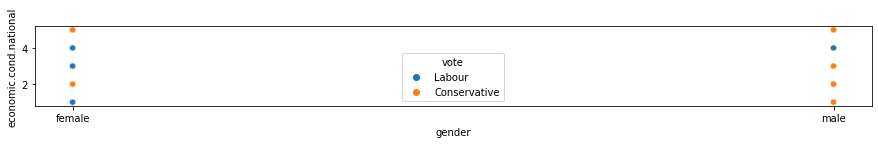

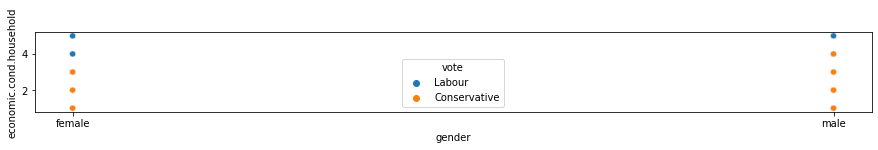

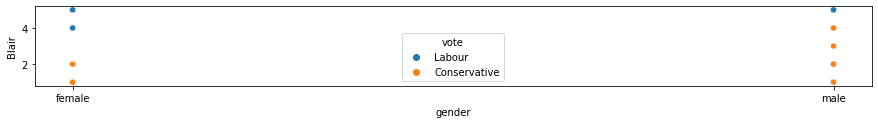

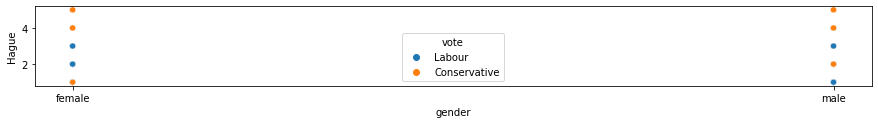

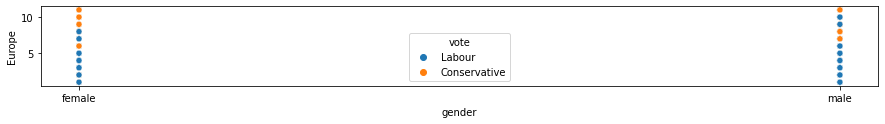

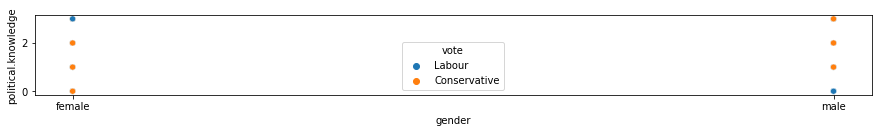

In [42]:
x=['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge']

    
for i in range(len(x)) :
    plt.figure(figsize=(15,12))
    plt.subplot(7,1,i+1)
    sns.scatterplot(y=data[x[i]], x=data.gender, hue=data.vote)
    plt.show()

<Figure size 1080x2160 with 0 Axes>

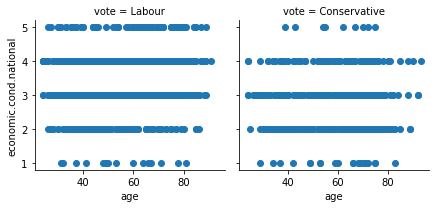

<Figure size 1080x2160 with 0 Axes>

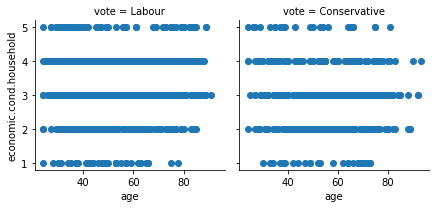

<Figure size 1080x2160 with 0 Axes>

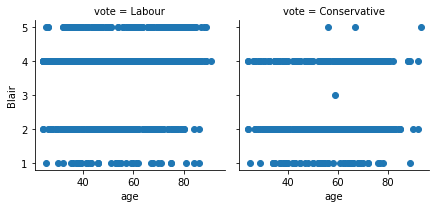

<Figure size 1080x2160 with 0 Axes>

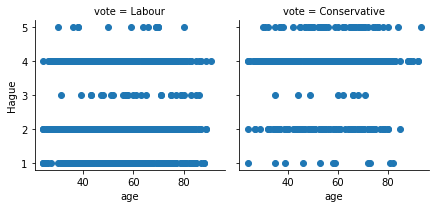

<Figure size 1080x2160 with 0 Axes>

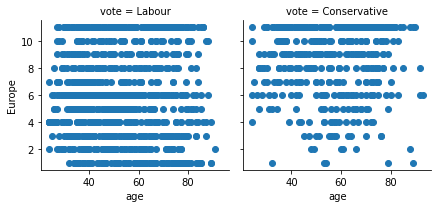

<Figure size 1080x2160 with 0 Axes>

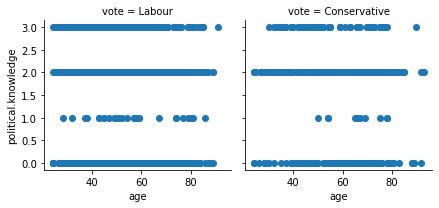

<Figure size 1080x2160 with 0 Axes>

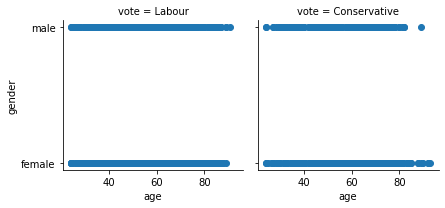

In [44]:
x=['economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge',"gender"]
for i in x :
    plt.figure(figsize=(15,30));
    g = sns.FacetGrid(data, col="vote", col_wrap=3, height=3);
    g = g.map(plt.scatter, "age", i);
    plt.show();

1. People who rated national economic and social condition best, voted in larger number to labour party as compared to that of conservative party across ages.2.Similarly people especially elderly ones who  rated best household economic and social condition have voted more in favour of labour party as compared to conservative party.3.People across ages who had rated the performance of Blair best have mostly voted in favour of labour party which is understandable.Similar trend is also visible in favour of Hague and conservative party.4.Voters across ages for labour party are uniformly divided in their opinion towards european integration. However, people who had voted in favour of conservative party seems to be more sceptical towards european integration than believing in the same.


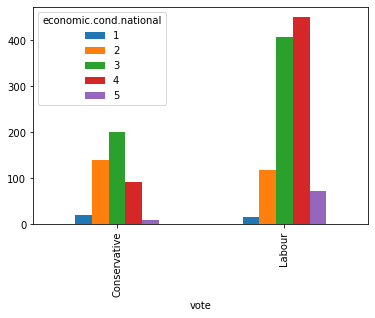

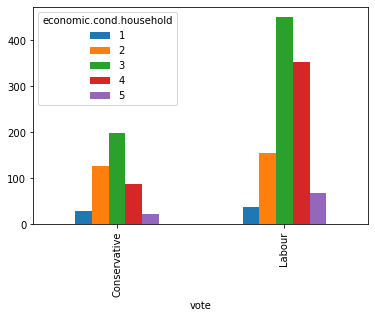

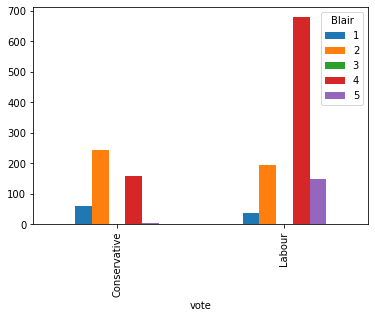

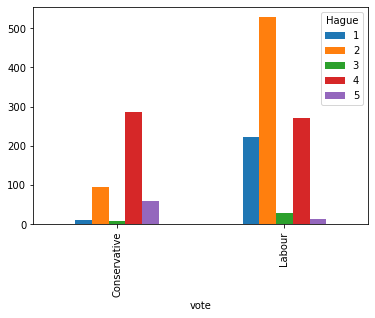

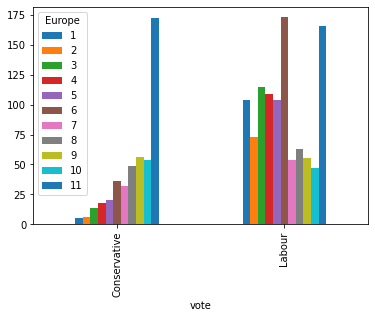

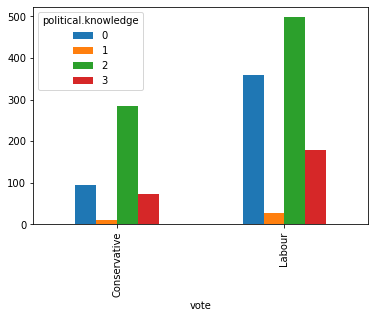

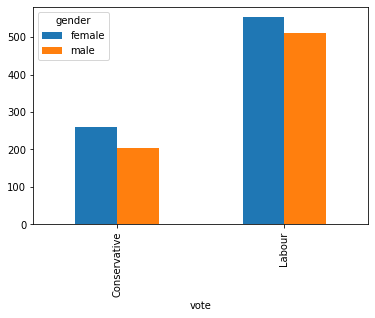

In [45]:
x=['economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge',"gender"]
for i in x :

    pd.crosstab(data.vote,data[i]).plot(kind = 'bar')
    #plt.xlabel('Satisfaction Score',fontsize = 16)
    #plt.ylabel("Number of Customers",fontsize = 16)

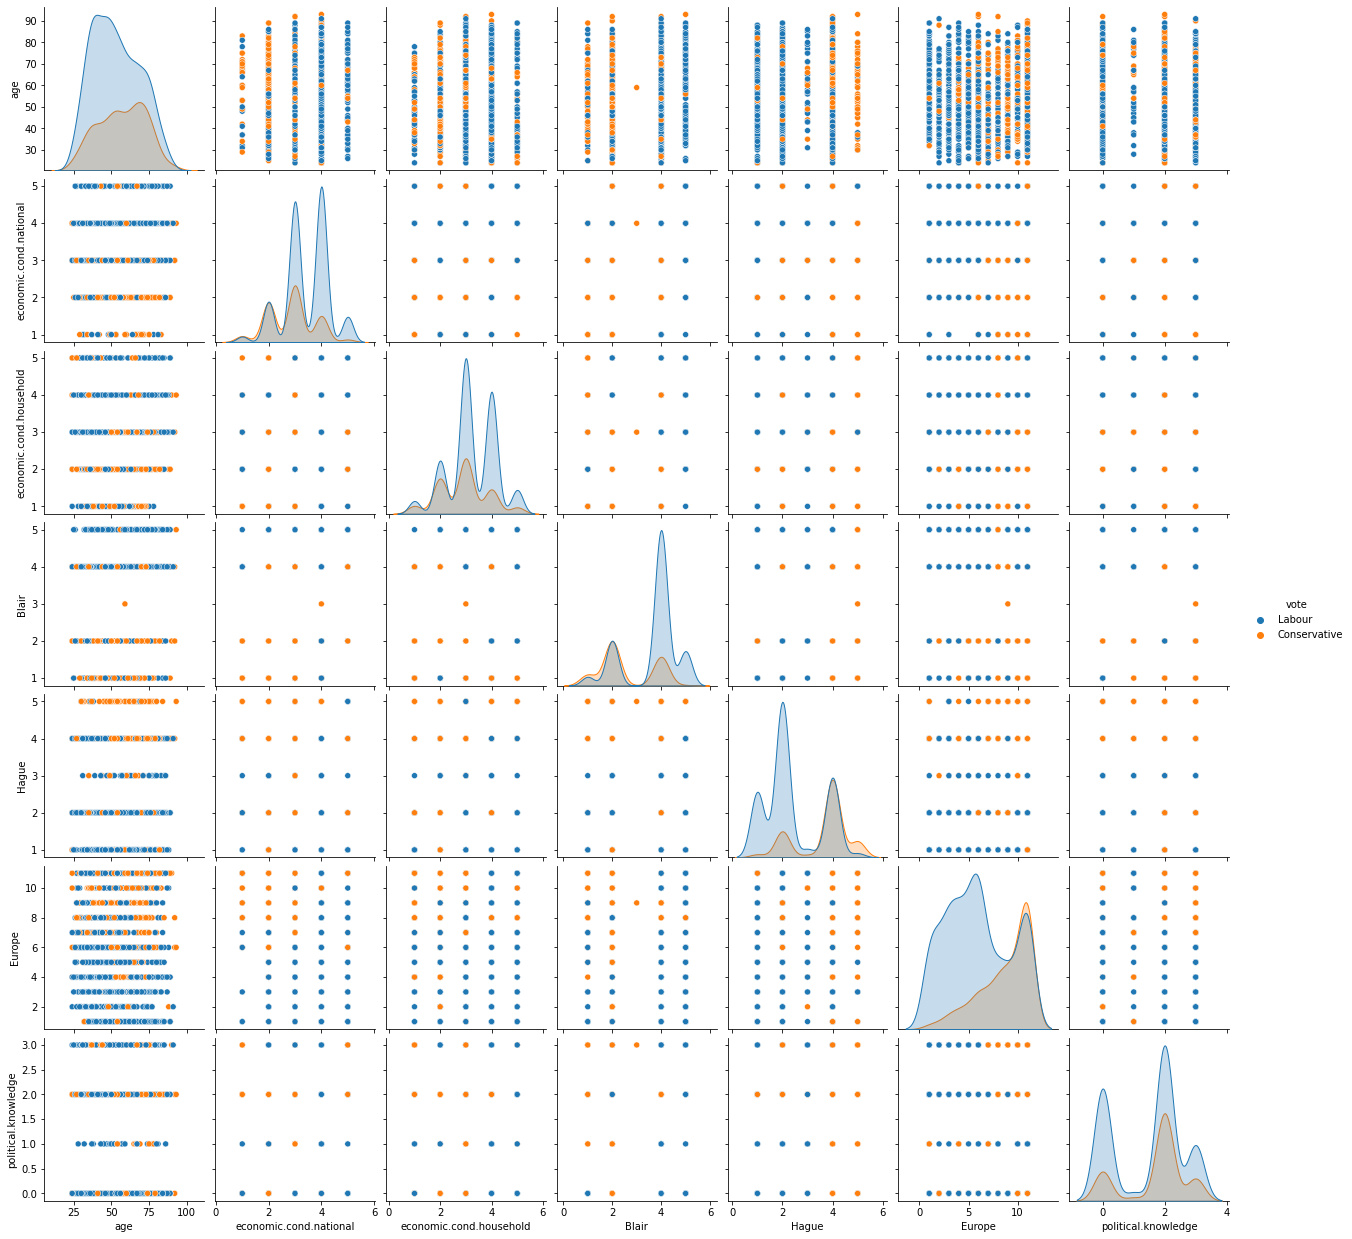

In [46]:
sns.pairplot(data, hue='vote')

# conclusion :

1.People voting for labour party are mostly of higher age bracket that those voting for conservative party.
2.People voting for conservative party believe national economic and social conditions are worse as compared to those voting for the labour party.
3.

In [47]:
#checking outlier

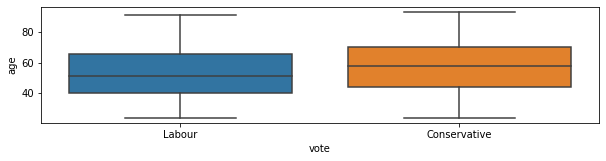

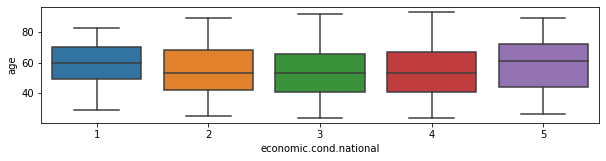

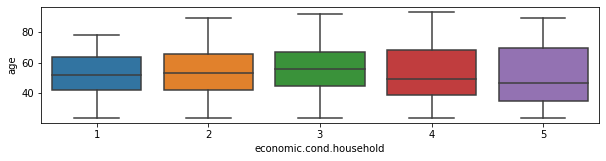

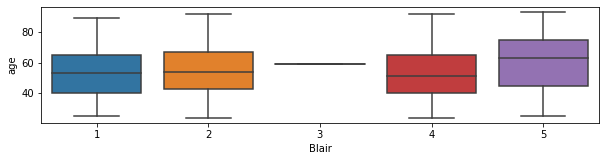

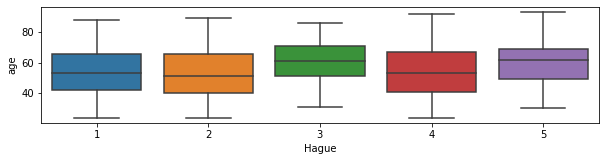

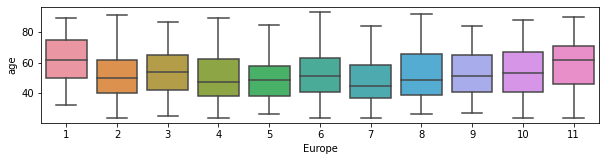

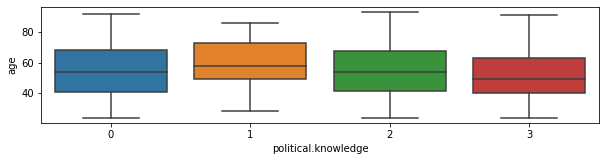

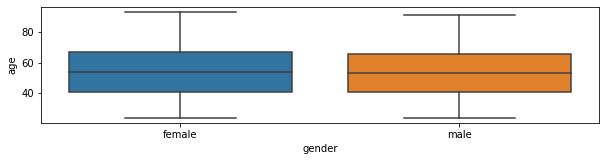

In [49]:
# Conclusion : Thus there are no outliers in the data

<AxesSubplot:>

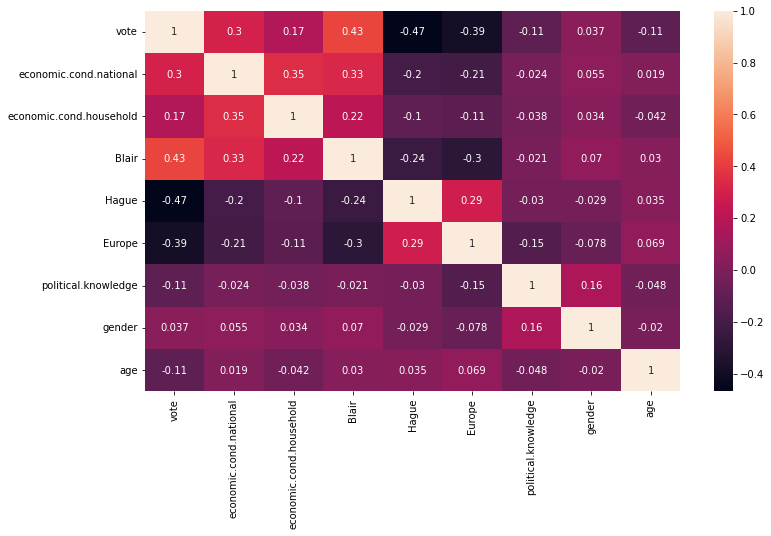

In [118]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True)

### 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [7]:
# Encoding the data
data_cat = data.select_dtypes(['object'])
data_cat.columns

Index(['vote', 'gender'], dtype='object')

Thus there are only two columns ( vote and gender which are of object type). Since there is no order in these two parameters, these data shall be label encoded


In [8]:
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

data['vote'] = LE.fit_transform(data['vote']).astype("int64")
data['gender'] = LE.fit_transform(data['gender']).astype("int64")


In [9]:
data.vote.value_counts()

1    1063
0     462
Name: vote, dtype: int64

In [10]:
# Thus labour=0 and conservative=1

In [11]:
data.gender.value_counts()

0    812
1    713
Name: gender, dtype: int64

In [12]:
# Thus female=0, male=1

### Since this is a classification problem comparison of parameters are not expected. Further there is only one continuous variable and others are categorical variable. Hence, scaling is not required.

However, for KNN classifier since the variables are of different scale ( age[24-93], whereas other variables are in a scale of 1-11, scaling would be necessary. Hence, scaling of the age variable would be done using standardscalar from sklearn library.

<AxesSubplot:ylabel='Count'>

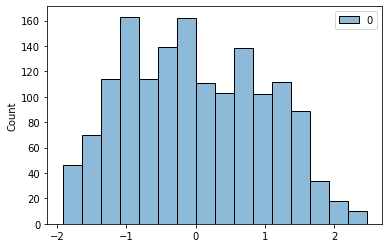

In [13]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data

scaled = scaler.fit_transform(np.array(data.age).reshape(-1, 1))
sns.histplot(scaled)

In [14]:
data.drop(columns="age", inplace=True)

In [15]:
data["age"]=scaled

In [16]:
data.head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age
0,1,3,3,4,1,2,2,0,-0.711973
1,1,4,4,4,4,5,2,1,-1.157661
2,1,4,4,5,2,3,2,1,-1.221331
3,1,4,2,2,1,4,0,0,-1.921698
4,1,2,2,1,1,6,2,1,-0.839313


## Train Test Split

In [17]:
# Copy all the predictor variables into X dataframe
X = data.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = data['vote']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.30, stratify=y)

median value of age of voters selected under the training dataset :  -0.07527638023846475
mean value of age of voters selected under the training dataset :  0.0
standard deviation of the  value of age of voters selected under the training dataset :  1.0


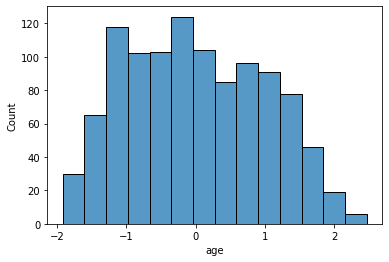

In [19]:
sns.histplot(X_train.age)
print("median value of age of voters selected under the training dataset : ",X_train.age.median())
print("mean value of age of voters selected under the training dataset : ",round(X_train.age.mean(),2))
print("standard deviation of the  value of age of voters selected under the training dataset : ",round(statistics.stdev(X_train.age),2))

median value of age of voters selected under the test dataset :  -0.04344152725353439
mean value of age of voters selected under the test dataset :  -0.0
standard deviation of the  value of age of voters selected under the test dataset :  1.01


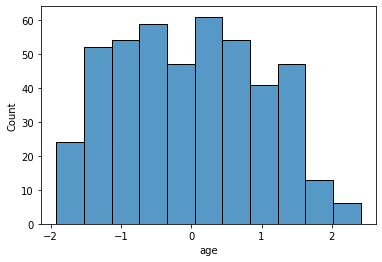

In [20]:
sns.histplot(X_test.age)
print("median value of age of voters selected under the test dataset : ",X_test.age.median())
print("mean value of age of voters selected under the test dataset : ",round(X_test.age.mean(),2))
print("standard deviation of the  value of age of voters selected under the test dataset : ",round(statistics.stdev(X_test.age),2))

In [21]:
# Thus the distribution of voter's age between train and the test dataset are comparable  and hence scaling is not required.

In [22]:
def univariateAnalysis2(cat):

    for i in cat.columns.drop(['age']):
        print("Details of " + i)
        print("----------------------------------------------------------------")
        print("proportion of counts of {} in percentage terms is :" .format(i))
        print(round(cat[i].value_counts(normalize=True),4)*100  )
        print("                                                          ")
        plt.figure()
        cat[i].value_counts().plot.bar(title="Frequency Distribution of " + i)
        plt.show()
        print("       ")



Details of economic.cond.national
----------------------------------------------------------------
proportion of counts of economic.cond.national in percentage terms is :
3    39.18
4    36.55
2    16.40
5     5.53
1     2.34
Name: economic.cond.national, dtype: float64
                                                          


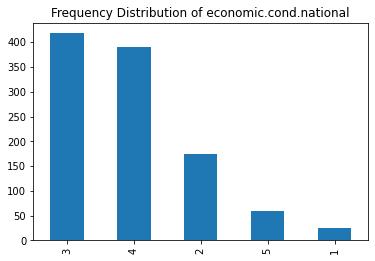

       
Details of economic.cond.household
----------------------------------------------------------------
proportion of counts of economic.cond.household in percentage terms is :
3    41.52
4    29.90
2    18.37
5     6.00
1     4.22
Name: economic.cond.household, dtype: float64
                                                          


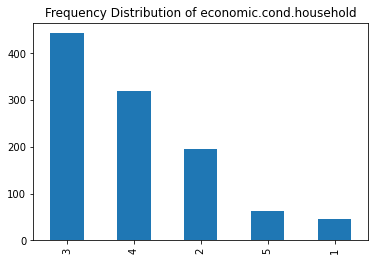

       
Details of Blair
----------------------------------------------------------------
proportion of counts of Blair in percentage terms is :
4    53.70
2    29.05
5    10.78
1     6.37
3     0.09
Name: Blair, dtype: float64
                                                          


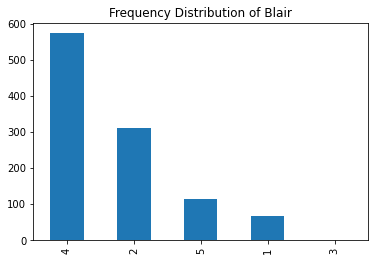

       
Details of Hague
----------------------------------------------------------------
proportion of counts of Hague in percentage terms is :
2    40.21
4    37.11
1    14.90
5     5.15
3     2.62
Name: Hague, dtype: float64
                                                          


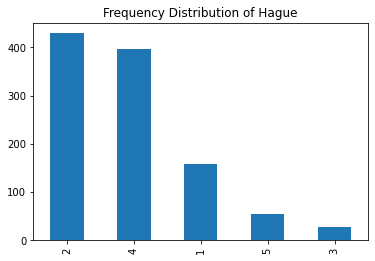

       
Details of Europe
----------------------------------------------------------------
proportion of counts of Europe in percentage terms is :
11    21.74
6     13.87
5      8.62
4      8.53
3      7.97
8      7.69
9      7.69
10     7.22
1      6.94
7      5.06
2      4.69
Name: Europe, dtype: float64
                                                          


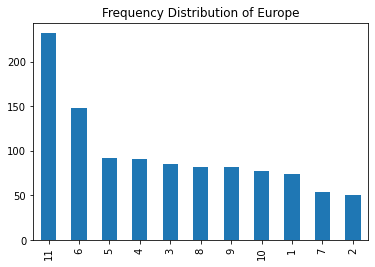

       
Details of political.knowledge
----------------------------------------------------------------
proportion of counts of political.knowledge in percentage terms is :
2    51.27
0    30.27
3    16.21
1     2.25
Name: political.knowledge, dtype: float64
                                                          


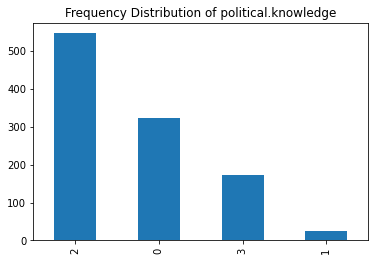

       
Details of gender
----------------------------------------------------------------
proportion of counts of gender in percentage terms is :
0    53.05
1    46.95
Name: gender, dtype: float64
                                                          


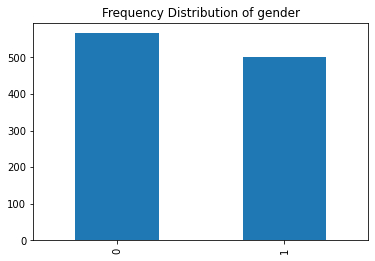

In [23]:
univariateAnalysis2(X_train)
        

Details of economic.cond.national
----------------------------------------------------------------
proportion of counts of economic.cond.national in percentage terms is :
3    41.27
4    33.19
2    17.90
5     5.02
1     2.62
Name: economic.cond.national, dtype: float64
                                                          


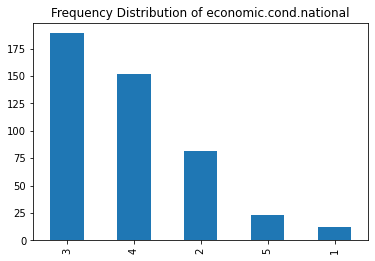

       
Details of economic.cond.household
----------------------------------------------------------------
proportion of counts of economic.cond.household in percentage terms is :
3    44.76
4    26.42
2    18.34
5     6.11
1     4.37
Name: economic.cond.household, dtype: float64
                                                          


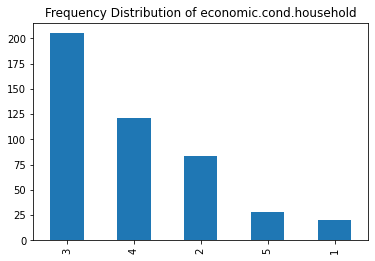

       
Details of Blair
----------------------------------------------------------------
proportion of counts of Blair in percentage terms is :
4    57.42
2    27.95
5     8.30
1     6.33
Name: Blair, dtype: float64
                                                          


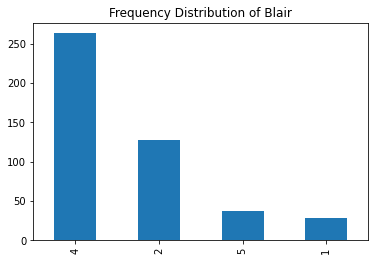

       
Details of Hague
----------------------------------------------------------------
proportion of counts of Hague in percentage terms is :
2    42.58
4    35.37
1    16.16
5     3.93
3     1.97
Name: Hague, dtype: float64
                                                          


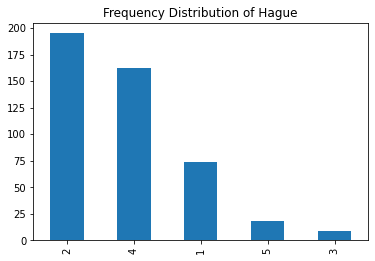

       
Details of Europe
----------------------------------------------------------------
proportion of counts of Europe in percentage terms is :
11    23.14
6     13.32
3      9.61
4      7.86
1      7.64
7      6.99
5      6.99
8      6.55
2      6.33
9      6.33
10     5.24
Name: Europe, dtype: float64
                                                          


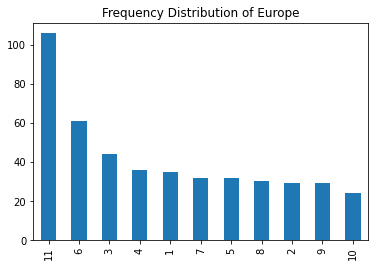

       
Details of political.knowledge
----------------------------------------------------------------
proportion of counts of political.knowledge in percentage terms is :
2    51.31
0    28.82
3    16.81
1     3.06
Name: political.knowledge, dtype: float64
                                                          


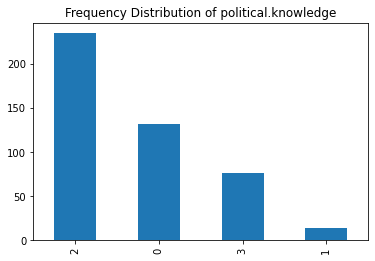

       
Details of gender
----------------------------------------------------------------
proportion of counts of gender in percentage terms is :
0    53.71
1    46.29
Name: gender, dtype: float64
                                                          


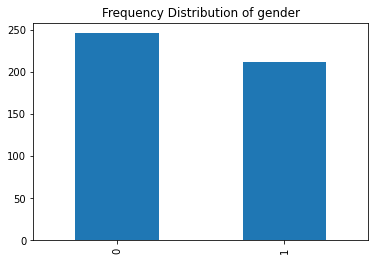

In [24]:
univariateAnalysis2(X_test)

In [25]:
round(y_train.value_counts(normalize=True),4)

1    0.6973
0    0.3027
Name: vote, dtype: float64

In [26]:
round(y_test.value_counts(normalize=True),4)

1    0.6965
0    0.3035
Name: vote, dtype: float64

*** conclusion : The split of data between train and test is uniform and hence need no further action.

## Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [27]:
lda= LinearDiscriminantAnalysis()
lor= LogisticRegression()


models=[lda,lor]

accuracy_train=[]
accuracy_test=[]



for i in models:  
    i.fit(X_train,y_train)
    accuracy_train.append(np.mean(cross_val_score(i, X_train, y_train, cv=5)))
    accuracy_test.append(np.mean(cross_val_score(i, X_test, y_test, cv=5)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['LDA','Logistic Regression']))

                     Train Accuracy  Test Accuracy
LDA                        0.834158       0.818777
Logistic Regression        0.829450       0.818753


## validity of the model :
    1. Test accuracy is very good for both LDA and logistics regression model thus denoting there is no overfitting issue in either of the model.
    2.Since the overall accuracy for both the models( ~ 83%) are higher than that of the general distribution of variables (~70%) the train or test data were not skewed.Hence accuracy is a good predictor for the classification problem.

## Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [28]:
KNN_model=KNeighborsClassifier()
NB_model = GaussianNB()

models=[KNN_model,NB_model]

accuracy_train=[]
accuracy_test=[]



for i in models:  
    i.fit(X_train,y_train)
    accuracy_train.append(np.mean(cross_val_score(i, X_train, y_train, cv=5)))
    accuracy_test.append(np.mean(cross_val_score(i, X_test, y_test, cv=5)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['KNN','NB']))

     Train Accuracy  Test Accuracy
KNN        0.824764       0.807764
NB         0.823834       0.829670


## validity of the model :
    1. Test accuracy is very good for both KNearestNeighbour and Gaussian NaiveBayes model. The difference between train and test accuracy for KNN is less than 10% which is acceptable as per the industry standard.Thus  there is no overfitting issue in either of the model.
    2.Since the overall accuracy for both the models( ~ 80-84%) are higher than that of the general distribution of variables (~70%) the train or test data were not skewed.Hence accuracy is a good predictor for the classification problem.

## Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

# hyper parameter tuning- LDA



In [29]:
lda_clf= LinearDiscriminantAnalysis()
parameters = {
    'solver': ['svd', 'lsqr', 'eigen'] ,
    'n_components': [None] + [1, 2, 5, 8, 13, 21, 34, 55],
    'store_covariance': [True, False],
    'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
clf = GridSearchCV(lda_clf, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)


{'n_components': None, 'solver': 'svd', 'store_covariance': True, 'tol': 0.01}


## Impact of hyper parameter tuning in the performance of the LDA model

In [58]:
lda_tuned= LinearDiscriminantAnalysis(n_components= None, solver= 'svd', store_covariance= True, tol= 0.01)

models=[lda,lda_tuned]

accuracy_train=[]
accuracy_test=[]

                                     
                                      
for i in models:  
        i.fit(X_train,y_train)
        accuracy_train.append(np.mean(cross_val_score(i, X_train, y_train, cv=5)))
        accuracy_test.append(np.mean(cross_val_score(i, X_test, y_test, cv=5)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['LDA','LDA_tuned']))

           Train Accuracy  Test Accuracy
LDA              0.834158       0.818777
LDA_tuned        0.834158       0.818777


## Conclusion :
There was no change in the model accuracy as most of the default parameters in the LDA model were found to be optimal in the grid search.

## hyper parameter tuning- Logistics regression


In [30]:
lor_tuned= LogisticRegression()

parameters = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
}
clg = GridSearchCV(lor_tuned, parameters, cv=5)
clg.fit(X_train, y_train)
print(clg.best_params_)


{'C': 0.615848211066026, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
## Impact of hyper parameter tuning in the performance of the Logistics regression model

In [59]:
lor_tuned= LogisticRegression(C= 0.615848211066026, max_iter= 1000, penalty= 'l1', solver= 'saga')

models=[lor,lor_tuned]

accuracy_train=[]
accuracy_test=[]


for i in models:  
    i.fit(X_train,y_train)
    accuracy_train.append(np.mean(cross_val_score(i, X_train, y_train, cv=5)))
    accuracy_test.append(np.mean(cross_val_score(i, X_test, y_test, cv=5)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['lor','lor_tuned']))

           Train Accuracy  Test Accuracy
lor               0.82945       0.818753
lor_tuned         0.83508       0.823125


## conclusion :
Model performance improved due to hyperparameter optimization

## hyper parameter tuning- K Nearest Neighbour model

In [33]:
KNN_model= KNeighborsClassifier()

parameters = {
               'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
}
clh = GridSearchCV(KNN_model, parameters, cv=5)
clh.fit(X_train, y_train)
print(clh.best_params_)


{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [60]:
KNN_model_tuned= KNeighborsClassifier(metric= 'manhattan', n_neighbors= 9, weights= 'uniform')

models=[KNN_model,KNN_model_tuned]

accuracy_train=[]
accuracy_test=[]


for i in models:  
    i.fit(X_train,y_train)
    accuracy_train.append(np.mean(cross_val_score(i, X_train, y_train, cv=5)))
    accuracy_test.append(np.mean(cross_val_score(i, X_test, y_test, cv=5)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['KNN_model','KNN_model_tuned']))

                 Train Accuracy  Test Accuracy
KNN_model              0.824764       0.807764
KNN_model_tuned        0.843517       0.810105


## Conclusion :
Model performance improved due to hyper parameter tuning

## hyper parameter tuning- Naive bayes model

In [35]:
NB_model = GaussianNB()

parameters = {
'var_smoothing': np.logspace(0,-9, num=100)
}
cli = GridSearchCV(NB_model, parameters, cv=5)
cli.fit(X_train, y_train)
print(cli.best_params_)


{'var_smoothing': 0.03511191734215131}


In [61]:
NB_model_tuned= GaussianNB(var_smoothing= 0.03511191734215131)

NB_model = GaussianNB()

models=[NB_model,NB_model_tuned]

accuracy_train=[]
accuracy_test=[]


for i in models:  
    i.fit(X_train,y_train)
    accuracy_train.append(np.mean(cross_val_score(i, X_train, y_train, cv=5)))
    accuracy_test.append(np.mean(cross_val_score(i, X_test, y_test, cv=5)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['NB_model','NB_model_tuned']))

                Train Accuracy  Test Accuracy
NB_model              0.823834       0.829670
NB_model_tuned        0.831333       0.820903


## Conclusion :
 The model with default hyperparameters works better with train and test indicating lesser overfitting.

In [250]:
print("----------------------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------------------


In [62]:
models=[lda,lor_tuned,KNN_model_tuned,NB_model]

accuracy_train=[]
accuracy_test=[]

for i in models:  
    i.fit(X_train,y_train)
    accuracy_train.append(np.mean(cross_val_score(i, X_train, y_train, cv=5)))
    accuracy_test.append(np.mean(cross_val_score(i, X_test, y_test, cv=5)))
        
pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['lda','lor_tuned','KNN_model_tuned','NB_model'])

,Train Accuracy,Test Accuracy
lda,0.834158,0.818777
lor_tuned,0.835080,0.823125
KNN_model_tuned,0.843517,0.810105
NB_model,0.823834,0.829670


## Conclusion :
Thus among all different models, logistics regression with hyperparameter tuning is the best performing model.

##  Bagging

In [86]:
model=[lda,lor_tuned,KNN_model_tuned,NB_model]
train_accuracy=[]
test_accuracy=[] 
bagged_hyper_model=[]
for i in model :
   
    print("Analysis of {} model".format(i))
    print (" ")
    bgcl = BaggingClassifier(base_estimator=i, n_estimators=50,random_state=1)
    bgcl = bgcl.fit(X_train, y_train)
    y_predict = bgcl.predict(X_test)
    accuracy_train=round(bgcl.score(X_train , y_train),4)
    
    accuracy_test=round(bgcl.score(X_test , y_test),4)
    
    print("Accuracy,classification report & confusion matrix for {}".format(i))
    print (" ")
    print("Accuracy score for the train data is {}".format(accuracy_train))
    print (" ")
    print("Accuracy score for the test data is {}".format(accuracy_test))
    print (" ")
    print("The classification report is as below: ")
    print (" ")
   # print(metrics.classification_report(y_test, y_predict))
    #cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
    #df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
     #                 columns = [i for i in ["No","Yes"]])
    #plt.figure(figsize = (7,5))
    #sns.heatmap(df_cm, annot=True ,fmt='g')
    train_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)
    bagged_hyper_model.append(bgcl)
    print (" ")
    print (" ")
    print (" ")
    print (" ")

Analysis of LinearDiscriminantAnalysis() model
 
Accuracy,classification report & confusion matrix for LinearDiscriminantAnalysis()
 
Accuracy score for the train data is 0.8388
 
Accuracy score for the test data is 0.8275
 
The classification report is as below: 
 
 
 
 
 
Analysis of LogisticRegression(C=0.615848211066026, max_iter=1000, penalty='l1',
                   solver='saga') model
 
Accuracy,classification report & confusion matrix for LogisticRegression(C=0.615848211066026, max_iter=1000, penalty='l1',
                   solver='saga')
 
Accuracy score for the train data is 0.8425
 
Accuracy score for the test data is 0.8297
 
The classification report is as below: 
 
 
 
 
 
Analysis of KNeighborsClassifier(metric='manhattan', n_neighbors=9) model
 
Accuracy,classification report & confusion matrix for KNeighborsClassifier(metric='manhattan', n_neighbors=9)
 
Accuracy score for the train data is 0.8688
 
Accuracy score for the test data is 0.8166
 
The classification repo

In [39]:
bagged_hyper_model

[BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(), n_estimators=50,
                   random_state=1),
 BaggingClassifier(base_estimator=LogisticRegression(C=0.615848211066026,
                                                     max_iter=1000, penalty='l1',
                                                     solver='saga'),
                   n_estimators=50, random_state=1),
 BaggingClassifier(base_estimator=KNeighborsClassifier(metric='manhattan',
                                                       n_neighbors=9),
                   n_estimators=50, random_state=1),
 BaggingClassifier(base_estimator=GaussianNB(), n_estimators=50, random_state=1)]

## Boosting

In [87]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
adb_model_score_train = ADB_model.score(X_train, y_train)
adb_model_score_test = ADB_model.score(X_test, y_test)
print(" The accuracy score for the train data is {}". format(adb_model_score_train))
print(" The accuracy score for the test data is {}". format(adb_model_score_test))
print(" The difference in accuracy between train and test data is {}". format(1-adb_model_score_test/adb_model_score_train))
print()
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

 The accuracy score for the train data is 0.8472352389878163
 The accuracy score for the test data is 0.8296943231441049
 The difference in accuracy between train and test data is 0.020703713722610706

[[229  94]
 [ 69 675]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       323
           1       0.88      0.91      0.89       744

    accuracy                           0.85      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.85      0.85      1067



In [90]:
train_accuracy

[0.8388, 0.8425, 0.8688, 0.8322, 0.8472]

In [89]:
train_accuracy.append(round(adb_model_score_train,4))
test_accuracy.append(round(adb_model_score_test,4))

## Gradient Boost

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_train)
GB_model_DT_train=gbcl.score(X_train, y_train)
GB_model_DT_test=gbcl.score(X_test, y_test)
print("Accuracy for Gradient Boost model for the train data is {}: " .format(GB_model_DT_train))
print("Accuracy for Gradient Boost model for the test data is {}: " .format(GB_model_DT_test))
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))


Accuracy for Gradient Boost model for the train data is 0.880037488284911: 
Accuracy for Gradient Boost model for the test data is 0.8253275109170306: 
[[245  78]
 [ 50 694]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       323
           1       0.90      0.93      0.92       744

    accuracy                           0.88      1067
   macro avg       0.86      0.85      0.85      1067
weighted avg       0.88      0.88      0.88      1067



In [93]:
train_accuracy.append(round(GB_model_DT_train,4))
test_accuracy.append(round(GB_model_DT_test,4))

In [94]:
train_accuracy

[0.8388, 0.8425, 0.8688, 0.8322, 0.8472, 0.88]

In [97]:

bagged_hyper_model.append(ADB_model)
bagged_hyper_model.append(gbcl)

## Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

### comparison between the performance of various models:

In [95]:
pd.DataFrame({'Train Accuracy': train_accuracy,'Test Accuracy': test_accuracy},
            index=['lda_bagged','lor_tuned_bagged','KNN_model_tuned_bagged','NB_model_bagged',"AdaBoost_bagged", " Gradient_Boost_bagged"])

,Train Accuracy,Test Accuracy
lda_bagged,0.8388,0.8275
lor_tuned_bagged,0.8425,0.8297
KNN_model_tuned_bagged,0.8688,0.8166
NB_model_bagged,0.8322,0.8406
AdaBoost_bagged,0.8472,0.8297
Gradient_Boost_bagged,0.8800,0.8253


In [98]:
bagged_hyper_model

[BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(), n_estimators=50,
                   random_state=1),
 BaggingClassifier(base_estimator=LogisticRegression(C=0.615848211066026,
                                                     max_iter=1000, penalty='l1',
                                                     solver='saga'),
                   n_estimators=50, random_state=1),
 BaggingClassifier(base_estimator=KNeighborsClassifier(metric='manhattan',
                                                       n_neighbors=9),
                   n_estimators=50, random_state=1),
 BaggingClassifier(base_estimator=GaussianNB(), n_estimators=50, random_state=1),
 AdaBoostClassifier(n_estimators=100, random_state=1),
 GradientBoostingClassifier(n_estimators=50, random_state=1)]

## confusion matrix :

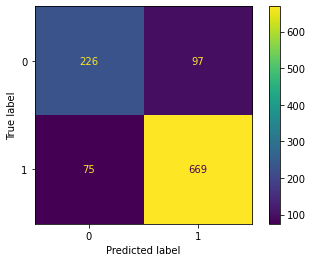

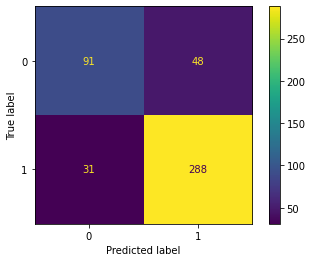

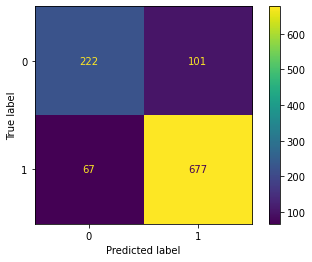

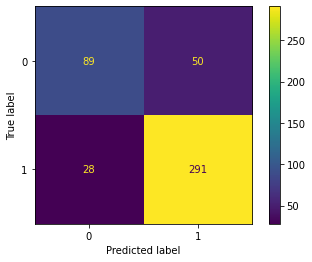

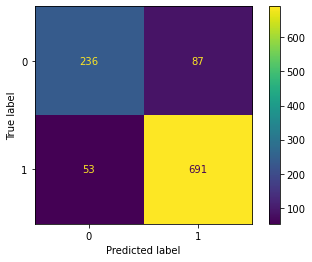

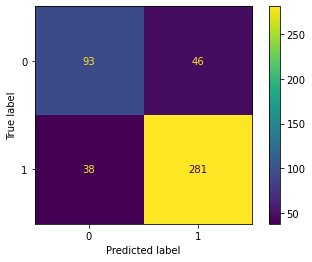

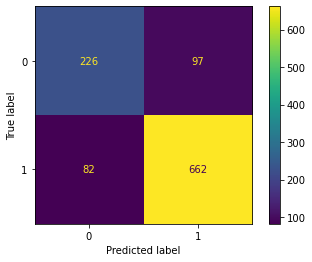

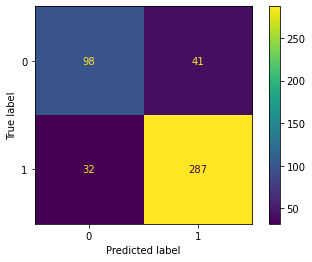

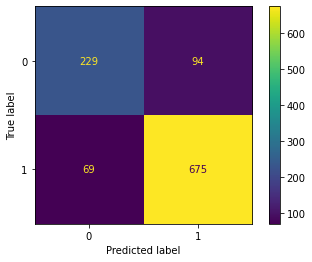

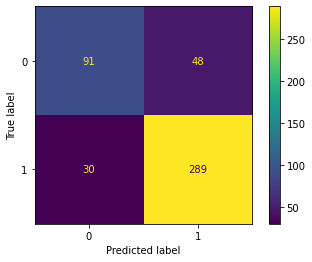

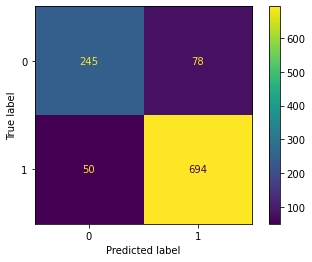

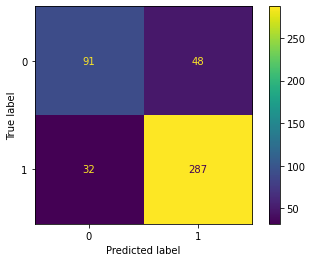

In [102]:
for model in bagged_hyper_model:
    
    plot_confusion_matrix(model,X_train,y_train);
    plot_confusion_matrix(model,X_test,y_test);

## Classification report

In [103]:
def classification_report_builder(model):

    for i in model :
            print("classification report of {} model using the train data is :".format(i))
            print(" ")
            print(metrics.classification_report(y_train, i.predict(X_train)))   
            print(" ")
            print(" ")
            print("classification report of {} model using the test data is :".format(i))
            print(" ")
            print(metrics.classification_report(y_test, i.predict(X_test))) 
            print(" ")
            print(" ")
            print(" ")
            print(" ")

In [104]:
classification_report_builder(bagged_hyper_model)

classification report of BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(), n_estimators=50,
                  random_state=1) model using the train data is :
 
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       323
           1       0.87      0.90      0.89       744

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

 
 
classification report of BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(), n_estimators=50,
                  random_state=1) model using the test data is :
 
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       139
           1       0.86      0.90      0.88       319

    accuracy                           0.83       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.82      0.83      0.82       45

## comments :
     ** LDA :
        1.Accuracy of train data is 84% vs that of test data is 83%- thus there is no underfitting/overfitting issue.
        2.Accuracy being around 83-4% is good considering in the sample the distribution of general and target class was in    70:30 ratio.
        3.f1 score of the train and test data was very comparable.
        4.Both recall and precision for train and test data for both the common and target class is highly consistent.
        
     ** Logistics regression model :
        1.Accuracy of train data is 84% vs that of test data is 83%- thus there is no underfitting/overfitting issue.
        2.Accuracy being around 83-4% is good considering in the sample the distribution of general and target class was in    70:30 ratio.
        3.f1 score of the train(84%) and test(88%) data was also quite comparable.
        4.Both recall and precision for train and test data for both the common and target class is highly consistent.
        
     ** KNN classifier model :
        1.Accuracy of train data is 85% vs that of test data is 81%- thus there is no severe underfitting/overfitting issue.
        2.Accuracy being around 81-5% is good considering in the sample the distribution of general and target class was in    70:30 ratio.
        3.f1 score of the train and test data was  comparable.
        4.Both recall and precision for train and test data for  target class is highly consistent.The same is also acceptable for the train data( <10% difference)
        
     ** Gaussian NB :
        1.Accuracy of train data is 84% vs that of test data is 83%- thus there is no underfitting/overfitting issue.
        2.Accuracy being around 83-4% is good considering in the sample the distribution of general and target class was in    70:30 ratio.
        3.f1 score of the train and test data was very comparable.
        4.Both recall and precision for train and test data for both the tcommon and target class  consistent.
        
      ** Adaboost  using Decision tree classifier model :
        1.Accuracy of train data is 85% vs that of test data is 83%- thus there is no underfitting/overfitting issue.
        2.Accuracy being around 83-5% is good considering in the sample the distribution of general and target class was in    70:30 ratio.
        3.f1 score of the train and test data was very comparable.
        4.Both recall and precision for train and test data for both the common and target class is very consistent.     
        
      ** Gradient boost using Decision tree classifier model :
        1.Accuracy of train data is 88% vs that of test data is 83%- thus there is sever underfitting/overfitting issue as the difference is within the acceptable difference range of 10%.
        2.Accuracy being around 83-8% is good considering in the sample the distribution of general and target class was in    70:30 ratio.
        3.f1 score of the train and test data was very comparable.
        4.Both recall and precision is little divergent between the  train and test data especially for the common class, however within acceptable range.

# ROC_AUC curve and score 

In [105]:
auc_score_=[]
def ROC_AUC_score(model) :
    probs = model.predict_proba(X_train)
    probs = probs[:, 1]
    auc = roc_auc_score(y_train, probs)
    print('AUC score for {} model : {} '.format(model, round(auc,2)*100))
    auc_score_.append(auc)

In [106]:
for i in bagged_hyper_model :
    ROC_AUC_score(i)

AUC score for BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(), n_estimators=50,
                  random_state=1) model : 89.0 
AUC score for BaggingClassifier(base_estimator=LogisticRegression(C=0.615848211066026,
                                                    max_iter=1000, penalty='l1',
                                                    solver='saga'),
                  n_estimators=50, random_state=1) model : 89.0 
AUC score for BaggingClassifier(base_estimator=KNeighborsClassifier(metric='manhattan',
                                                      n_neighbors=9),
                  n_estimators=50, random_state=1) model : 93.0 
AUC score for BaggingClassifier(base_estimator=GaussianNB(), n_estimators=50, random_state=1) model : 89.0 
AUC score for AdaBoostClassifier(n_estimators=100, random_state=1) model : 92.0 
AUC score for GradientBoostingClassifier(n_estimators=50, random_state=1) model : 94.0 


In [107]:
h=pd.DataFrame({'Train Accuracy': train_accuracy,'Test Accuracy': test_accuracy}, index=["Linear Discriminant Analysis","Logistic Regression","K Neighbors Classifier","GaussianNB","ADB model-DT"," GB model-DT"])
h["diff between train and test (%)"]=(round((1-h['Test Accuracy']/h['Train Accuracy'])*100,2))
h["Auc_score"]=[round(x,4) for x in auc_score_]
h


,Train Accuracy,Test Accuracy,diff between train and test (%),Auc_score
Linear Discriminant Analysis,0.8388,0.8275,1.35,0.8921
Logistic Regression,0.8425,0.8297,1.52,0.8928
K Neighbors Classifier,0.8688,0.8166,6.01,0.9331
GaussianNB,0.8322,0.8406,-1.01,0.8908
ADB model-DT,0.8472,0.8297,2.07,0.9172
GB model-DT,0.8800,0.8253,6.22,0.9413


## ROC_AUC curve

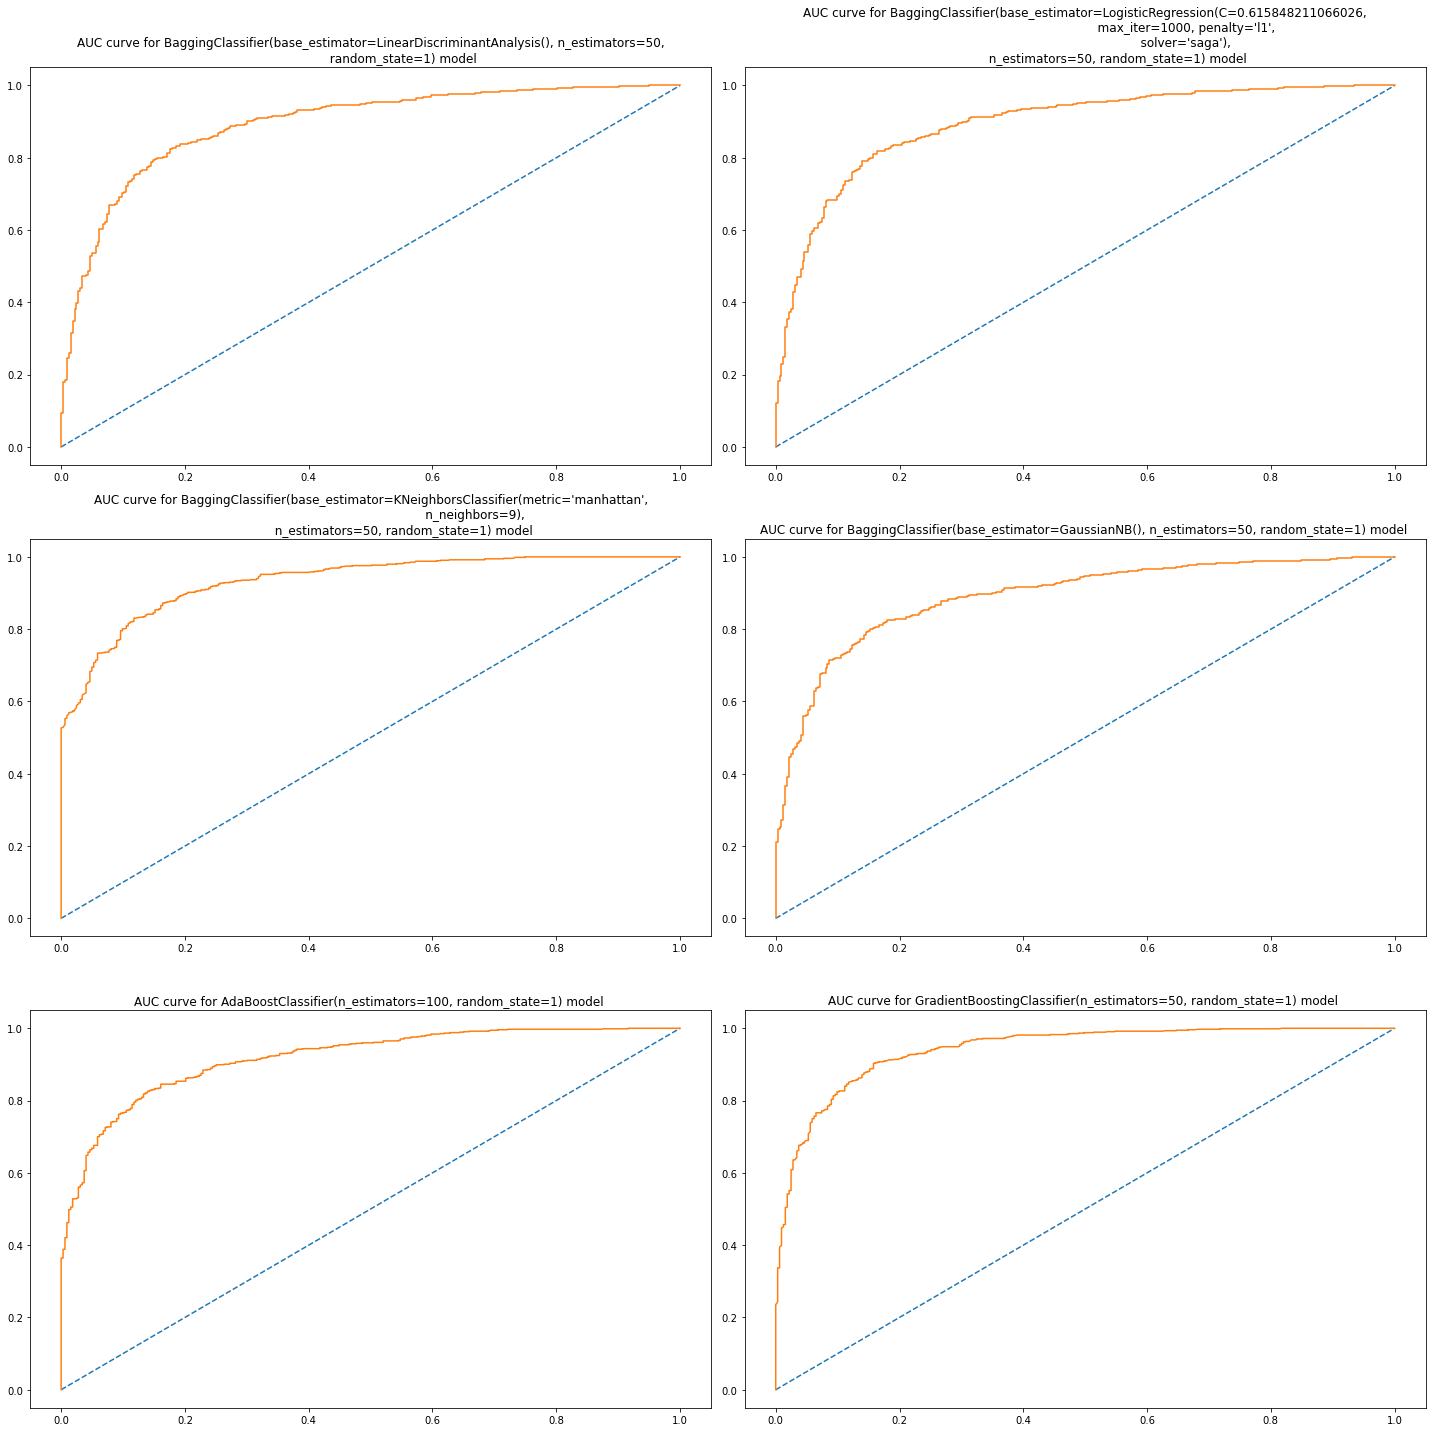

In [108]:
    
    fig=plt.figure(figsize=(20,20))
    for i in range(0,len(bagged_hyper_model)):
        ax=fig.add_subplot(3,2,i+1)
        probs = bagged_hyper_model[i].predict_proba(X_train)
        probs = probs[:, 1]
        train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.plot(train_fpr, train_tpr);
        plt.title("AUC curve for {} model ".format(bagged_hyper_model[i]))
        plt.tight_layout()

## Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

In [116]:
X_test.columns

Index(['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague',
       'Europe', 'political.knowledge', 'gender', 'age'],
      dtype='object')

In [115]:
ADB_model.feature_importances_

array([0.05, 0.04, 0.06, 0.08, 0.06, 0.03, 0.01, 0.67])

In [117]:
gbcl.feature_importances_

array([0.03980522, 0.01595227, 0.17491015, 0.41507844, 0.16156043,
       0.1122834 , 0.        , 0.08041008])

*** Thus as per the AdaBoost model the most important feature is the age of the voter. However, as per the gradient Boost model the most important feature is the rating of Hague.The correlation between age and vote is slight negative, meaning that higher the age of the voter people are less likely to vote for Conservative party ( label=1). 

# Problem related to text data Processing

In [119]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('inaugural')
from nltk.corpus import inaugural
from nltk.tokenize import sent_tokenize

a=inaugural.fileids()
b=inaugural.raw('1941-Roosevelt.txt')
c=inaugural.raw('1961-Kennedy.txt')
d=inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


###  Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

## Roosevelt

In [130]:
b_words=inaugural.words('1941-Roosevelt.txt')
b_words_lower=( x.lower() for x in b_words)
print("There are {} words in the inaugural speech of Roosevelt" .format(len(b_words)))

There are 1536 words in the inaugural speech of Roosevelt


In [131]:
charecters=inaugural.raw('1941-Roosevelt.txt')
print("There are {} charecters in the inaugural speech of Roosevelt" .format(len(charecters)))

There are 7571 charecters in the inaugural speech of Roosevelt


In [132]:
sentences = inaugural.raw('1941-Roosevelt.txt')
number_of_sentences = sent_tokenize(sentences)

print("There are {} sentences in the inaugural speech of Roosevelt" .format(len(number_of_sentences)))



There are 68 sentences in the inaugural speech of Roosevelt


## Kennedy

In [133]:
c_words=inaugural.words('1961-Kennedy.txt')
c_words_lower=( x.lower() for x in c_words)
print("There are {} words in the inaugural speech of Kennedy" .format(len(c_words)))

There are 1546 words in the inaugural speech of Kennedy


In [134]:
charecters=inaugural.raw('1961-Kennedy.txt')
print("There are {} charecters in the inaugural speech of Kennedy" .format(len(charecters)))

There are 7618 charecters in the inaugural speech of Kennedy


In [135]:
sentences = inaugural.raw('1961-Kennedy.txt')
number_of_sentences = sent_tokenize(sentences)

print("There are {} sentences in the inaugural speech of Kennedy" .format(len(number_of_sentences)))

There are 52 sentences in the inaugural speech of Kennedy


## Nixon

In [136]:
d_words=inaugural.words('1973-Nixon.txt')
d_words_lower=( x.lower() for x in d_words)
print("There are {} words in the inaugural speech of Nixon" .format(len(d_words)))

There are 2028 words in the inaugural speech of Nixon


In [137]:
charecters=inaugural.raw('1973-Nixon.txt')
print("There are {} charecters in the inaugural speech of Nixon" .format(len(charecters)))

There are 9991 charecters in the inaugural speech of Nixon


In [138]:
sentences = inaugural.raw('1973-Nixon.txt')
number_of_sentences = sent_tokenize(sentences)

print("There are {} sentences in the inaugural speech of Nixon" .format(len(number_of_sentences)))

There are 68 sentences in the inaugural speech of Nixon


###  Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

## Roosevelt

In [139]:
print("Word count before removal of stopwords:{}". format(len(b_words)))

from nltk.corpus import stopwords
stop=stopwords.words("english")+list(string.punctuation)+["--"]
#stop=stop.append("--")
b_words_clean=[x for x in b_words if x  not in stop]
b_words_lower_clean=[x for x in b_words_lower if x  not in stop]
print("Word count after removal of stopwords:{}". format(len(b_words_clean)))


Word count before removal of stopwords:1536
Word count after removal of stopwords:695


In [140]:
# sentence before removal of stopwords
sent_tokenize(" ".join(b_words))[2]

"In Lincoln ' s day the task of the people was to preserve that Nation from disruption from within ."

In [141]:
# sentence after removal of stopwords
sent_tokenize(" ".join(b_words_clean))[0]

'On national day inauguration since 1789 people renewed sense dedication United States In Washington day task people create weld together nation In Lincoln day task people preserve Nation disruption within In day task people save Nation institutions disruption without To us come time midst swift happenings pause moment take stock recall place history rediscover may If risk real peril inaction Lives nations determined count years lifetime human spirit The life man three score years ten little little less The life nation fullness measure live There men doubt There men believe democracy form Government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide But Americans know true Eight years ago life Republic seemed frozen fatalistic terror proved true We midst shock acted We acted quickly boldly decisively These later years living years fruitful years people democracy For brought us greater security I ho

## Kennedy

In [142]:
print("Word count before removal of stopwords:{}". format(len(c_words)))
c_words_clean=[x for x in c_words if x  not in stop]
c_words_lower_clean=[x for x in c_words_lower if x  not in stop]
print("Word count after removal of stopwords:{}". format(len(c_words_clean)))


Word count before removal of stopwords:1546
Word count after removal of stopwords:739


In [143]:
# sentence before removal of stopwords
sent_tokenize(" ".join(c_words))[0]

'Vice President Johnson , Mr .'

In [144]:
# sentence after removal of stopwords
sent_tokenize(" ".join(c_words_clean))[0]

'Vice President Johnson Mr Speaker Mr Chief Justice President Eisenhower Vice President Nixon President Truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change For I sworn I Almighty God solemn oath forebears l prescribed nearly century three quarters ago The world different For man holds mortal hands power abolish forms human poverty forms human life And yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand God We dare forget today heirs first revolution Let word go forth time place friend foe alike torch passed new generation Americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights Nation always committed committed today home around world Let every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend oppose foe

## Nixon

In [145]:
print("Word count before removal of stopwords:{}". format(len(d_words)))
d_words_clean=[x for x in d_words if x  not in stop]
d_words_lower_clean=[x for x in d_words_lower if x  not in stop]
print("Word count after removal of stopwords:{}". format(len(d_words_clean)))


Word count before removal of stopwords:2028
Word count after removal of stopwords:895


In [93]:
# sentence before removal of stopwords
sent_tokenize(" ".join(d_words))[0]

'Mr .'

In [94]:
# sentence after removal of stopwords
sent_tokenize(" ".join(d_words_clean))[0]

'Mr Vice President Mr Speaker Mr Chief Justice Senator Cook Mrs Eisenhower fellow citizens great good country share together When met four years ago America bleak spirit depressed prospect seemingly endless war abroad destructive conflict home As meet today stand threshold new era peace world The central question us How shall use peace Let us resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad Let us resolve become time great responsibilities greatly borne renew spirit promise America enter third century nation This past year saw far reaching results new policies peace By continuing revitalize traditional friendships missions Peking Moscow able establish base new durable pattern relationships among nations world Because America bold initiatives 1972 long remembered year greatest progress since end World War II toward lasting peace world The peace seek world flimsy peace merely interlude wars peace endure generations come It imp

### Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [146]:
# Three most frequent words used in inaugural address
nltk.FreqDist(b_words_lower_clean).most_common(3)

[('nation', 12), ('know', 10), ('spirit', 9)]

Thus the thre most frequent word in the speech of President Roosevelt were nation, know and spirit

In [147]:
nltk.FreqDist(c_words_lower_clean).most_common(3)

[('let', 16), ('us', 12), ('world', 8)]

Thus the thre most frequent word in the speech of President Kennedy were let, us and world

In [148]:
nltk.FreqDist(d_words_clean).most_common(3)

[('us', 26), ('America', 21), ('peace', 19)]

Thus the thre most frequent word in the speech of President Nixon were  us, America and peace

### Plot the word cloud of each of the three speeches. (after removing the stopwords)

## Roosevelt

Word Cloud for President Roosevelt's inaugural address (after cleaning)!!


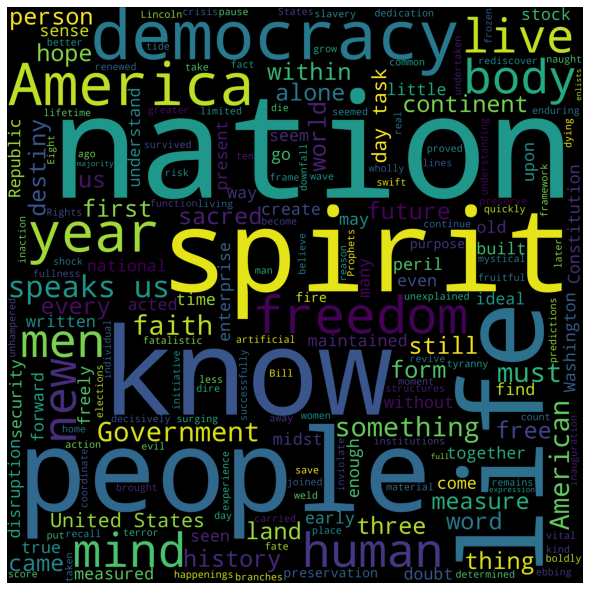

In [149]:
wc_b=" ".join(b_words_clean)
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_b) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Roosevelt's inaugural address (after cleaning)!!")
plt.show()


## Kennedy

Word Cloud for President Kennedy's inaugural address (after cleaning)!!


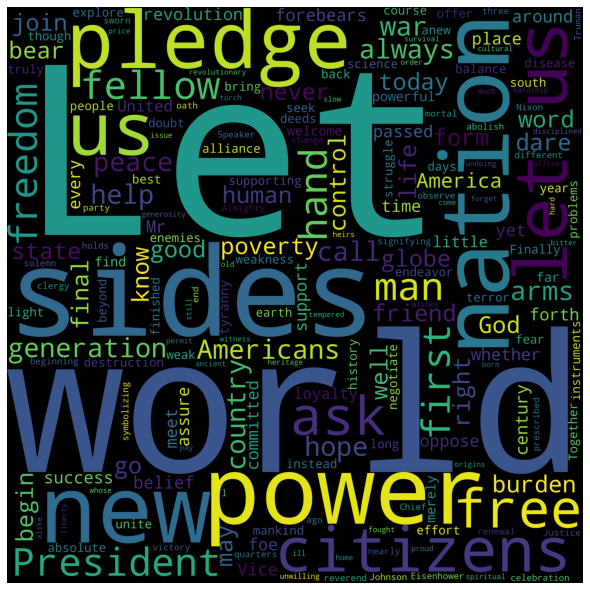

In [150]:
wc_c=" ".join(c_words_clean)
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_c) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Kennedy's inaugural address (after cleaning)!!")
plt.show()


## Nixon

Word Cloud for President Nixon's inaugural address (after cleaning)!!


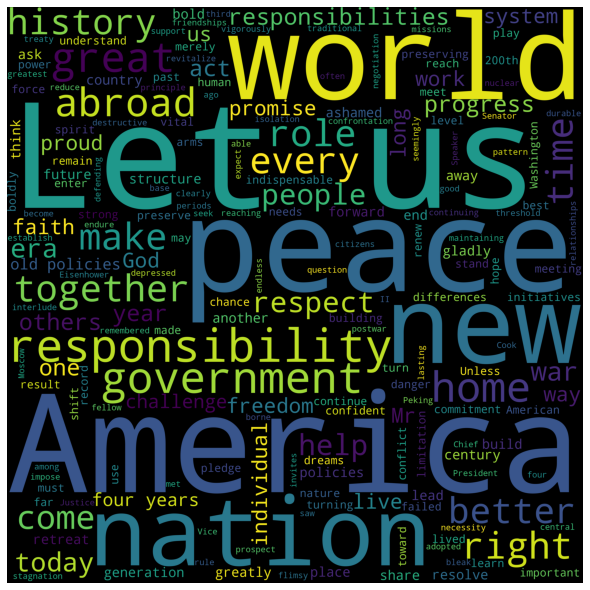

In [151]:
wc_d=" ".join(d_words_clean)
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_d) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Nixon's inaugural address (after cleaning)!!")
plt.show()
